<a href="https://colab.research.google.com/github/a1ip/da-basics-in-python/blob/main/lec08_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Для работы сегодня нам понадобятся библиотеки NumPy и MatplotLib:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Генерация случайных чисел
Компьютер работает по детерминированным алгоритмам, поэтому кажется, что в нём нет места случайностям. Тем не менее для некоторых алгоритмов критически необходима **генерация случайных чисел**, которые распределены специфическим образом в заданном диапазоне.

В **теории вероятности** для дискретных случайных величин вводится мера **вероятности случайной величины**, а для непрерывных случайных величин используется мера **плотности вероятности**.

*Выборка* представляет из себя конечный набор значений случайной величины.
Давайте посмотрим на распределение случайных чисел, которые даёт библиотека NumPy:

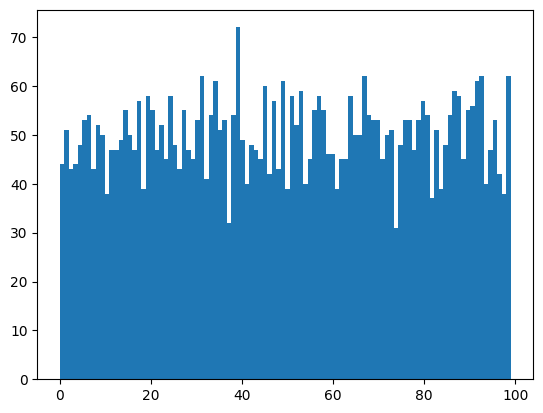

In [ ]:
import matplotlib.pyplot as plt
A = np.random.randint(0, 100, 5000)
plt.hist(A, bins=100)
plt.show()

Данное распределение называется *равномерным*. То есть все числа из данного диапазона *равновероятны*. Разница в частоте их появления является нормальным статистическим отклонением.

# Статистические характеристики выборки

Дла анализа данных требуется знать основы *математической статистики*.

Все объекты, которые требуется статистически проанализировать, называются *генеральная совокупность*. Иногда генеральная совокупность — это всё взрослое население определённого региона (например, когда изучается отношение потенциальных избирателей к кандидату), чаще всего задаётся несколько критериев, определяющих объекты исследования. Например, женщины 25—69 лет, использующие крем для рук определённой марки не реже одного раза в неделю, и имеющие доход не ниже 5 тысяч рублей на одного члена семьи.

В статистике исследование всей генеральной совокупности часто невозможно, поэтому предлагается изучать *репрезентативную выборку* — относительное небольшое подмножество, которое обладает свойствами всей генеральной совокупности.

Вопросы, связанные с определением необходимого *объёма выборки*, а также с доказательством того, что она является репрезентативной, мы оставим в стороне.

Разберёмся с основными моментами:
1) **среднее арифметическое** выборки соответствует *математическому ожиданию случайной величины* (если числа — случайные величины), и вычисляется так:
   $$\bar{x} = \frac{1}{n}\sum_{i=1}^n x_i  =  \frac{1}{n} (x_1+\cdots+x_n).$$
   
2) **среднеквадратическое отклонение** — показатель рассеивания значений случайной величины относительно её математического ожидания, и вычисляется так:
  $$S=\sqrt{\frac{1}{n}\sum_{i=1}^n\left(x_i-\bar{x}\right)^2}.$$
  
Сгенерируем выборку чисел среднего объёма при помощи **нормальной случайной величины** `numpy.random.normal` (распределение Гаусса):

In [ ]:
data = np.random.normal(10, 5, 200)
data

array([15.85740921, 19.08575204, 14.98071285,  6.91466021,  3.41982771,
        9.70880044, 11.26218855, 10.78782125,  9.00106556,  0.48902576,
        5.75653699, 19.97306785,  5.4040136 , 15.92279834,  4.83115398,
        8.02256086, 14.54789355, 14.70048527, 10.29938761,  3.8850904 ,
       20.50471439,  0.50223622, 12.64761415,  3.25920134, 10.08771326,
        3.63464552,  1.46044401,  3.6850024 , 14.48455279, 15.3040856 ,
       16.57585387,  9.14035308,  7.78565852,  7.18987932, 14.43365548,
       14.04683729, 11.95701245,  6.45703971,  5.63054   , 13.92291699,
       10.07809239,  1.74602472,  5.52704751,  2.61595849, 11.49555019,
        5.81452043,  2.11068392, 15.02377223,  7.70619689,  6.7835306 ,
       10.53309127, 21.02094329,  8.57057885,  9.58386806, 11.70376178,
        8.05378384, 12.71189369,  8.84208834,  7.03950994,  7.83847319,
       10.95842202,  8.27083116, -3.65710044,  9.02111452,  3.7555901 ,
       14.74598927,  4.79690816,  9.33903265, 12.77129858,  9.10

Для первичного "взгляда" на эти числа можно отобразить их в виде *гистограммы* (как бы визуализация частотного анализа с предварительным округлением вниз):

(array([ 2.,  1.,  2.,  7.,  8., 11.,  9., 13., 14., 17., 23., 14., 15.,
         9., 21., 13.,  9.,  2.,  5.,  5.]),
 array([-3.65710044, -2.42319825, -1.18929607,  0.04460612,  1.27850831,
         2.51241049,  3.74631268,  4.98021487,  6.21411705,  7.44801924,
         8.68192143,  9.91582361, 11.1497258 , 12.38362799, 13.61753017,
        14.85143236, 16.08533455, 17.31923673, 18.55313892, 19.78704111,
        21.02094329]),
 <BarContainer object of 20 artists>)

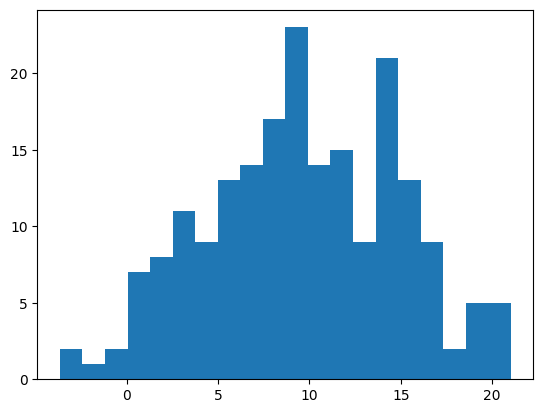

In [ ]:
plt.hist(data, bins=20)

*Нормальная* случайная величиная, *распределённая по Гауссу*, напоминает метание дротика в мишень. Мы целимся в 10-ку, но у нас также есть некая средняя ширина промаха.

**Среднее арифметическое** и **среднеквадратическое отклонение** идеально подходят для характеристики подобного распределения:

In [ ]:
print("Среднее арифметическое:", data.mean())
print("Среднеквадратическое отклонение: ", data.std())

Среднее арифметическое: 9.665784747227603
Среднеквадратическое отклонение:  5.235285550618323


Как видите, при начально заданных модельных характеристиках 10 и 5 соответственно, мы нашли их очень точно по данной выборке.

## Пример статистического анализа неслучайной выборки
Теперь рассмотрим другую задачу:

    В компании зарплаты сотрудников являются секретом из-за закона о персональных данных. Однако, данные о зарплате ежегодно публикуются в обезличенной форме, а также оглашаются статистические характеристики распределения зарплат.

In [ ]:
salaries = np.array([12600, 12792, 12792, 12850, 12900, 12950, 13000, 13040, 13190, 13200, 13500,
                     13650, 13700, 13800, 13900, 14050, 14100, 14180, 14200, 14300, 14500, 14900,
                     15050, 15620, 16500, 19100, 39000, 259000, 279000, 499000])
print('Количество сотрудников:', len(salaries))
print('Зарплатный фонд:', salaries.sum())
print('Максимальная зарплата:', salaries.max())
print('Минимальная зарплата:', salaries.min())
print('Средняя зарплата сотрудника:', salaries.mean())

Количество сотрудников: 30
Зарплатный фонд: 1440364
Максимальная зарплата: 499000
Минимальная зарплата: 12600
Средняя зарплата сотрудника: 48012.13333333333


    Работники удивлены высокой средней зарплатой, и считают, что либо им говорят неправду, либо где-то закралась математическая ошибка. Найдите в чём проблема.

Вот гистограмма распределения зарплат:

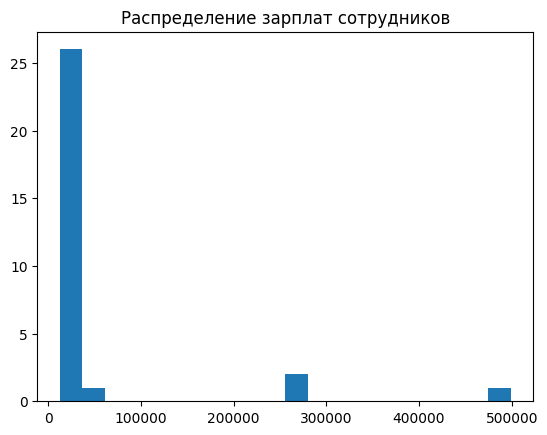

In [ ]:
import matplotlib.pyplot as plt
plt.hist(salaries, bins=20)
plt.title("Распределение зарплат сотрудников")
plt.show()

Для такого распределения *среднее арифметическое* — плохая характеристика. На неё слишком сильно влияют выбросы —  зарплаты директора, двух его заместителей и секретаря.

Статистика предлагает нам альтернативные характеристики распределения — [квантили](https://ru.wikipedia.org/wiki/%D0%9A%D0%B2%D0%B0%D0%BD%D1%82%D0%B8%D0%BB%D1%8C).

**медиана** — самый важный квантиль. Это число, которое находится **в середине этого набора, если его упорядочить по возрастанию**, то есть такое число, что половина из элементов набора не меньше него, а другая половина не больше.

**Первый квартиль** — это 0,25-квантиль. Это число, меньше которого находится 1/4 чисел набора, а больше него 3/4 набора.

**Третий квартиль** — это 0,75-квантиль. Это число, меньше которого находится 3/4 чисел набора, а больше него 1/4 набора.

*Второй квартиль* не говорят, т.к. это получается то же самое, что медиана.

Предположим, бухгалтер опубликовал эти квартили:

In [ ]:
print('Первый квартиль:', np.quantile(salaries, 0.25))
print('Медианная зарплата:', np.median(salaries))
print('Третий квартиль:', np.quantile(salaries, 0.75))

Первый квартиль: 13077.5
Медианная зарплата: 13975.0
Третий квартиль: 15012.5


Ответ: средняя зарплата слишком сильно отличается от медианной! Поэтому нам нужно не столько смотреть на среднее, сколько на квартили.

Для визуализации основных квартилей выборки существует график *Box plot*:

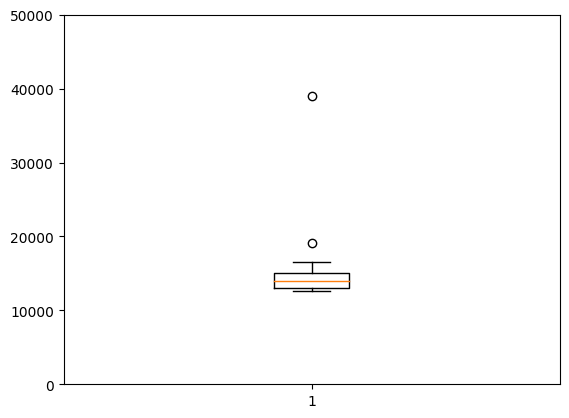

In [ ]:
plt.boxplot(salaries)
plt.axis(ymin=0, ymax=50000)
plt.show()

# Изображения как массивы NumPy
Одномерные массивы — это замечательно, но данные часто представляют из себя двумерный, трёхмерный или даже многомерный массив чисел.

Яркий пример — [растровое изображение](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D1%82%D1%80%D0%BE%D0%B2%D0%B0%D1%8F_%D0%B3%D1%80%D0%B0%D1%84%D0%B8%D0%BA%D0%B0). В нём пиксели имеют две координаты — индекс строки и индекс столбца, при этом каждый пиксел в классической модели RGB содержит три компоненты цвета: красную (red), зелёную (green) и синюю (blue). Получается, что изображение — это трёхмерный массив.

Давайте откроем изображение главного здания МГУ при помощи Matplotlib и выполним с ним некоторые операции.

In [ ]:
!wget -O "msu_original.jpg" "https://drive.google.com/uc?id=1Sg0ozKPncRlYTT2yT8J5aOs_-fgk1Sy0"

--2022-11-23 08:02:47--  https://drive.google.com/uc?id=1Sg0ozKPncRlYTT2yT8J5aOs_-fgk1Sy0
Resolving drive.google.com (drive.google.com)... 108.177.125.113, 108.177.125.138, 108.177.125.102, ...
Connecting to drive.google.com (drive.google.com)|108.177.125.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-1g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/gd0gftta9pgip8qb0a8g71og7hst01ga/1669190550000/05476118052512889131/*/1Sg0ozKPncRlYTT2yT8J5aOs_-fgk1Sy0?uuid=a689443e-72fa-41b0-9505-9ce396c3dd78 [following]
--2022-11-23 08:02:49--  https://doc-0g-1g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/gd0gftta9pgip8qb0a8g71og7hst01ga/1669190550000/05476118052512889131/*/1Sg0ozKPncRlYTT2yT8J5aOs_-fgk1Sy0?uuid=a689443e-72fa-41b0-9505-9ce396c3dd78
Resolving doc-0g-1g-docs.googleusercontent.com (doc-0g-1g-docs.googleusercontent.com)... 64.233.187.132, 2404:6800:4008:c05::84
Connecting to do

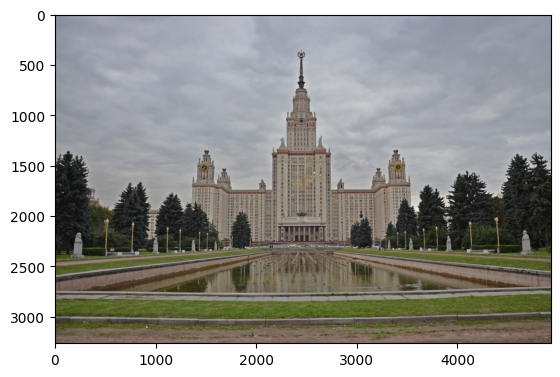

In [ ]:
import matplotlib.pyplot as plt
msu_image = plt.imread("msu_original.jpg")
plt.imshow(msu_image)

Обратите внимание на тип картинки:

In [ ]:
type(msu_image)

numpy.ndarray

Это значит, что это массив NumPy!

К нему применимы массовые векторные операции, которые отразятся сразу на всех пикселах и всех компонентах цвета:

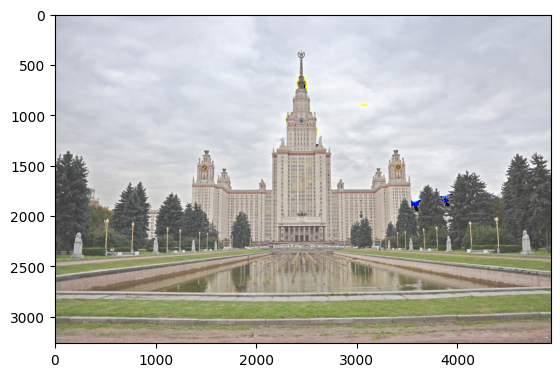

In [ ]:
plt.imshow(msu_image + 50)

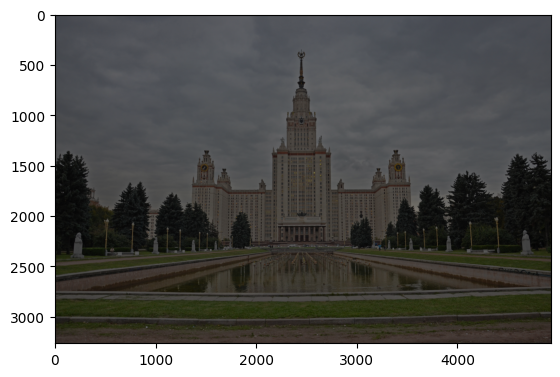

In [ ]:
plt.imshow(msu_image // 2)

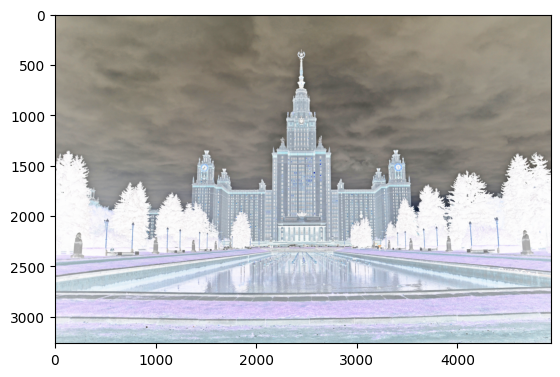

In [ ]:
plt.imshow(np.cos(np.pi / 2 * msu_image / 255))

Чтобы узнать размеры массива NumPy, используется атрибут `shape`. Обратите внимание, что это не функция-метод, а *кортеж*, поэтому скобки возле `shape` не пишут:

In [ ]:
msu_image.shape

(3264, 4928, 3)

Для многомерных массивов NumPy есть функция **транспонирования** `np.transpose`. Она возвращает новый массив с теми же числами, но оси координат массива меняют порядок. Второй параметр функции — кортеж с порядком перестановки осей координат.

Оригинальный порядок для трёхмерного массива — (0, 1, 2), а мы сделаем порядок (1, 0, 2), чтобы не трогать цветовую ось.
Наша картинка в этом случае "поворачивается" (на самом деле ещё и отзеркаливается).

(4928, 3264, 3)


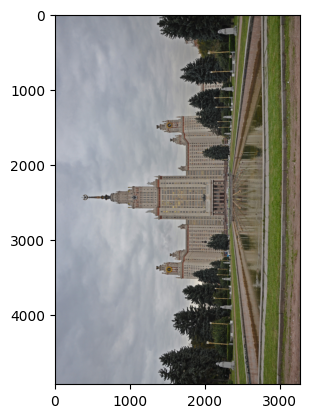

In [ ]:
msu_transposed = np.transpose(msu_image, (1, 0, 2))
print(msu_transposed.shape)
plt.imshow(msu_transposed)

А вот как вы сможете объяснить эти изменения?

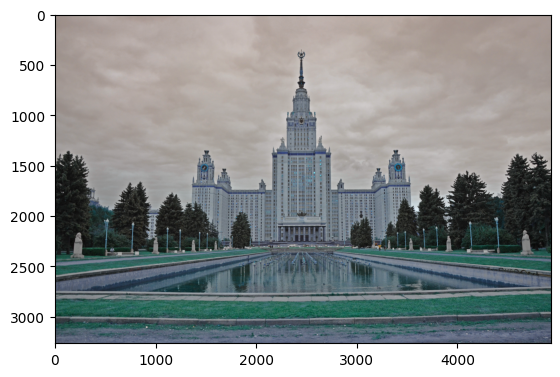

In [ ]:
plt.imshow(msu_image[:, :, ::-1])

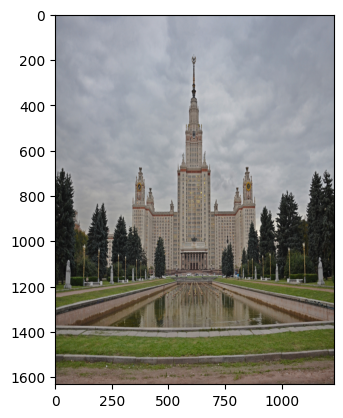

In [ ]:
plt.imshow(msu_image[::2, ::4])

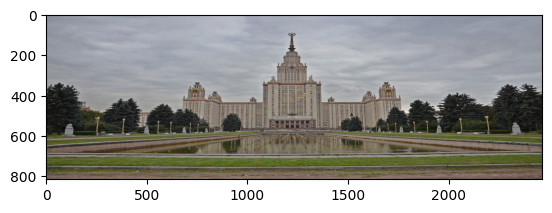

In [ ]:
plt.imshow(msu_image[::4, ::2])

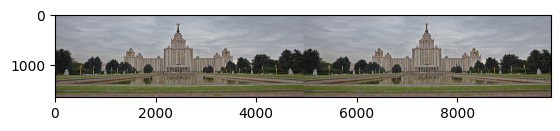

In [ ]:
plt.imshow(msu_image.reshape((3264 // 2, 4928*2, 3)))

# Многомерные массивы NumPy

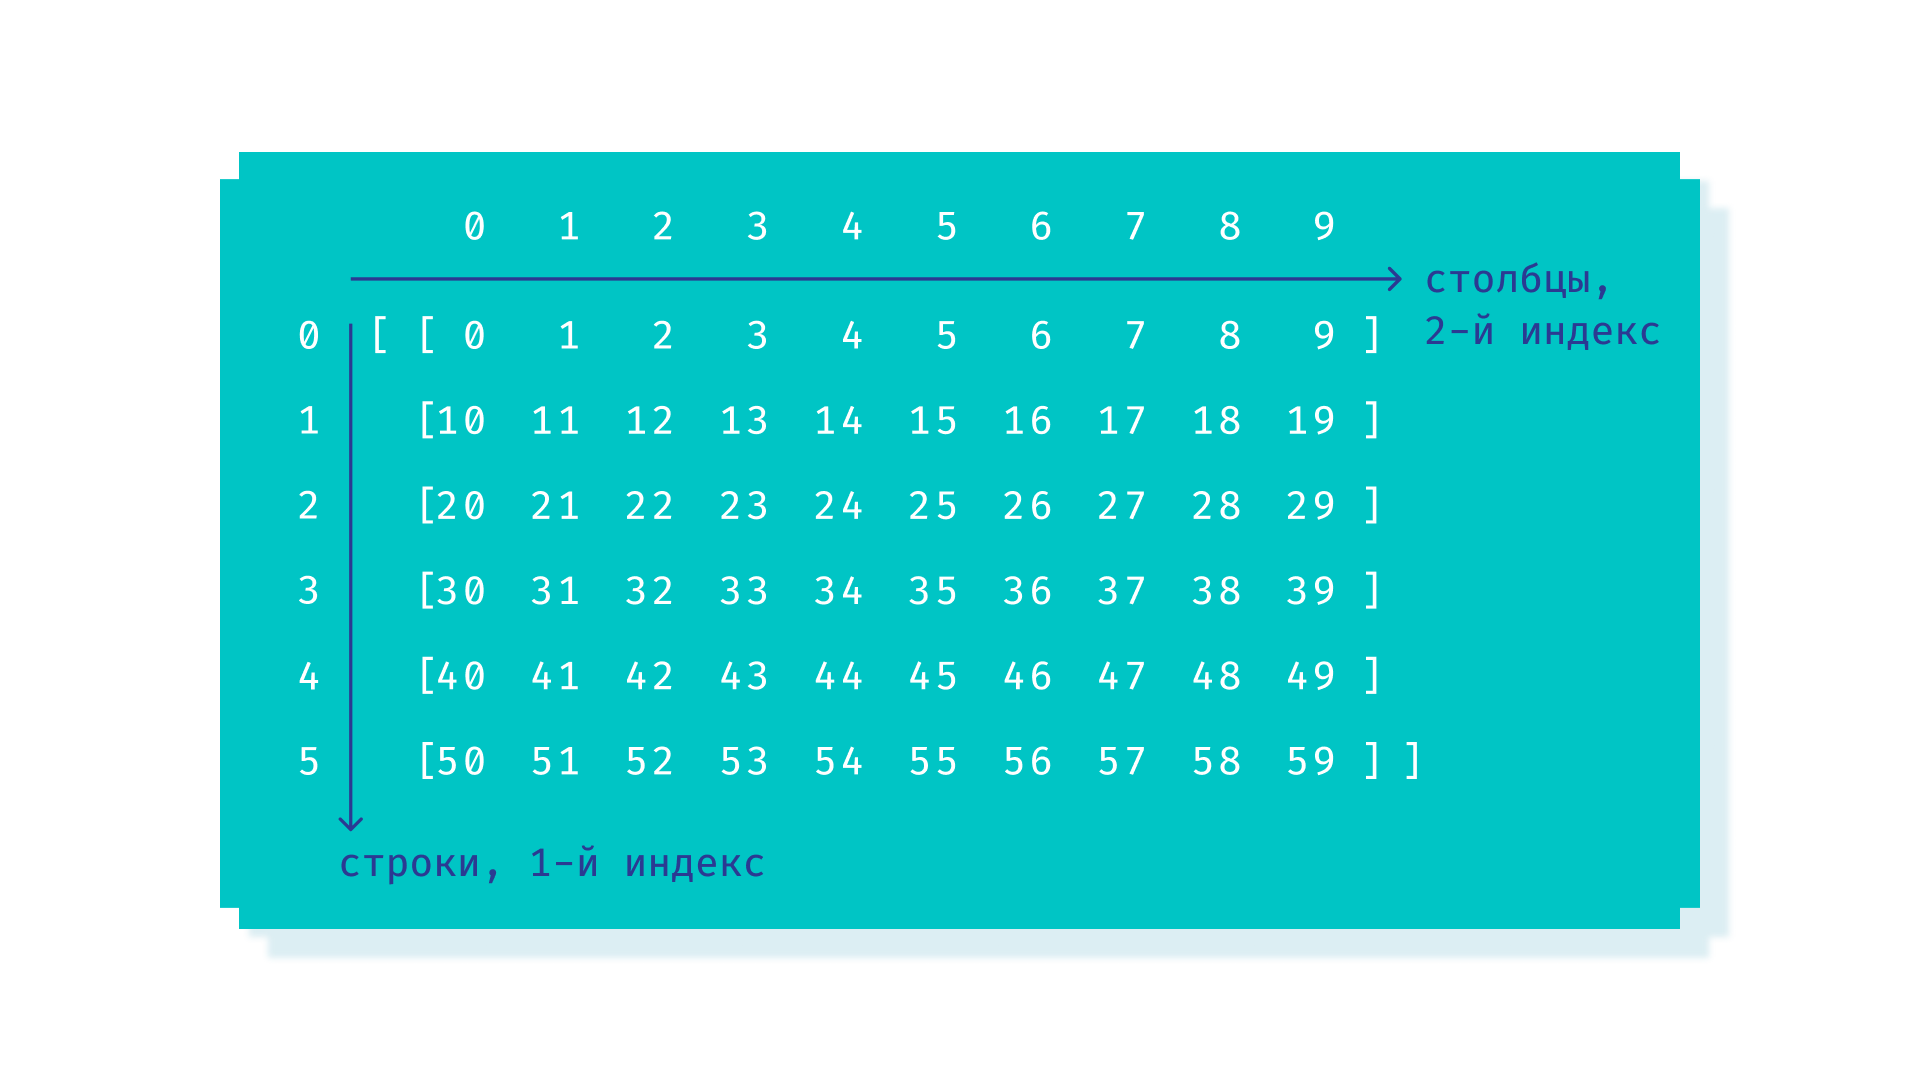

## Создание многомерных массивов

Создать многомерный массив можно несколькими способами. Первый — `reshape` одномерного массива:

In [ ]:
A = np.arange(0, 60).reshape(6, 10)  # Первый индекс - высота, второй - ширина!
print(A)

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]]


In [ ]:
np.zeros_like(A)  # Создать массив по форме как данный, но состящий из нулей.

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

## Срезы
В классических срезах строк или списков у нас два параметра `[start:stop]`, где start входит в вырезаемый диапазон, а stop не входит.

Срезы многомерных массивов работают так же, только осуществляются *сразу по нескольким координатам*.
При этом срезаемые диапазоны по каждой из координат отделяются друг от друга запятой.
Как и во всех срезах, *левая граница среза входит в диапазон, а правая — нет*.

In [ ]:
A[2:5, 2:7]

array([[22, 23, 24, 25, 26],
       [32, 33, 34, 35, 36],
       [42, 43, 44, 45, 46]])

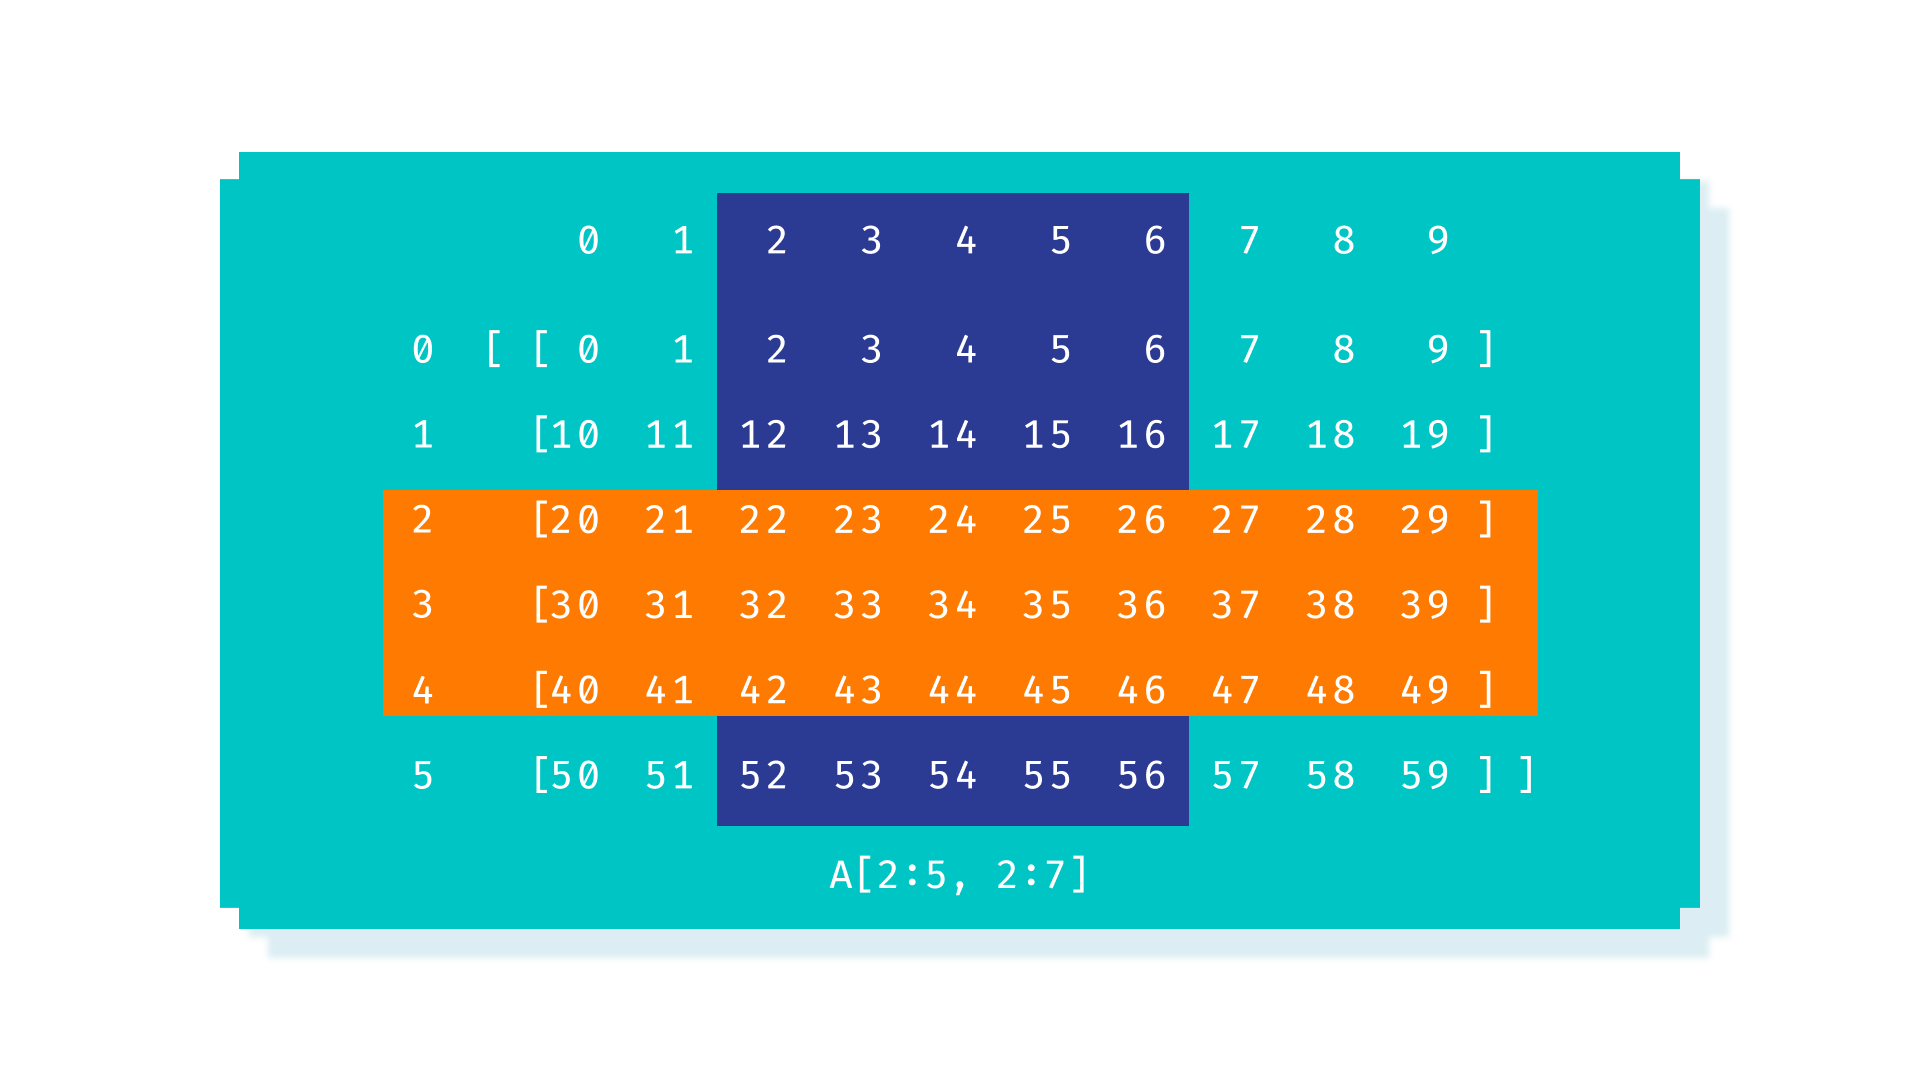

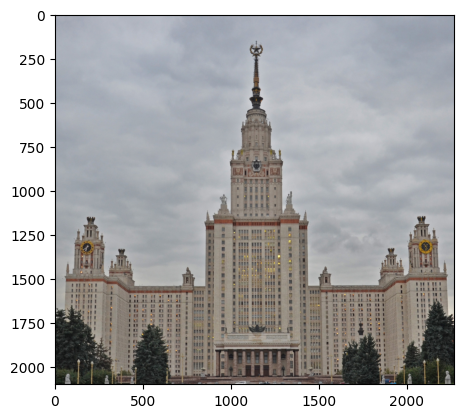

In [ ]:
plt.imshow(msu_image[200:2300, 1300:3570])

Если указать в срезе только один диапазон, то массив будет срезаться по 1-й координате (выбор строк).

In [ ]:
A[3:5]

array([[30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49]])

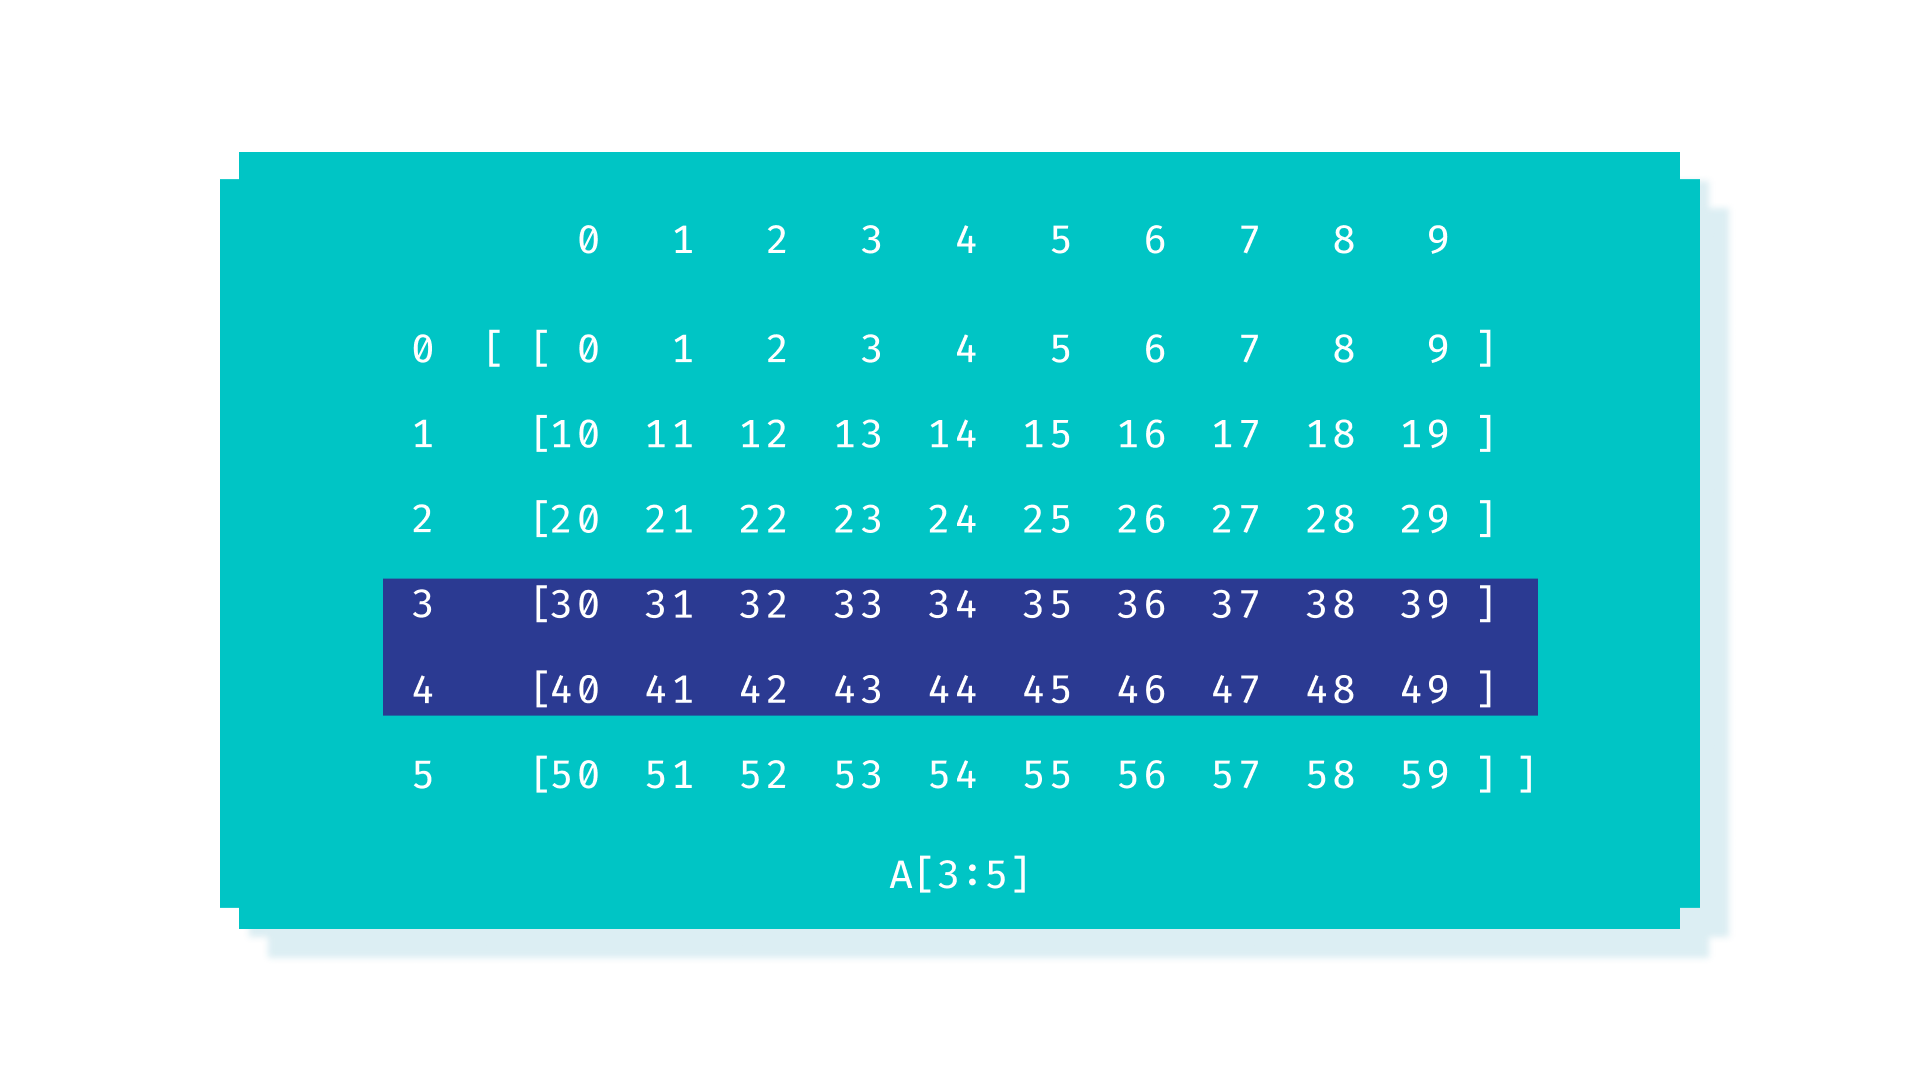

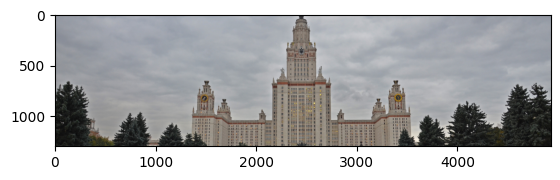

In [ ]:
plt.imshow(msu_image[700:2000])

Если нужно срезать по 2-й координате (выбор столбцов), то нужно поставить перед запятой `:`, что значит "от края до края":

In [ ]:
A[:,3:5]

array([[ 3,  4],
       [13, 14],
       [23, 24],
       [33, 34],
       [43, 44],
       [53, 54]])

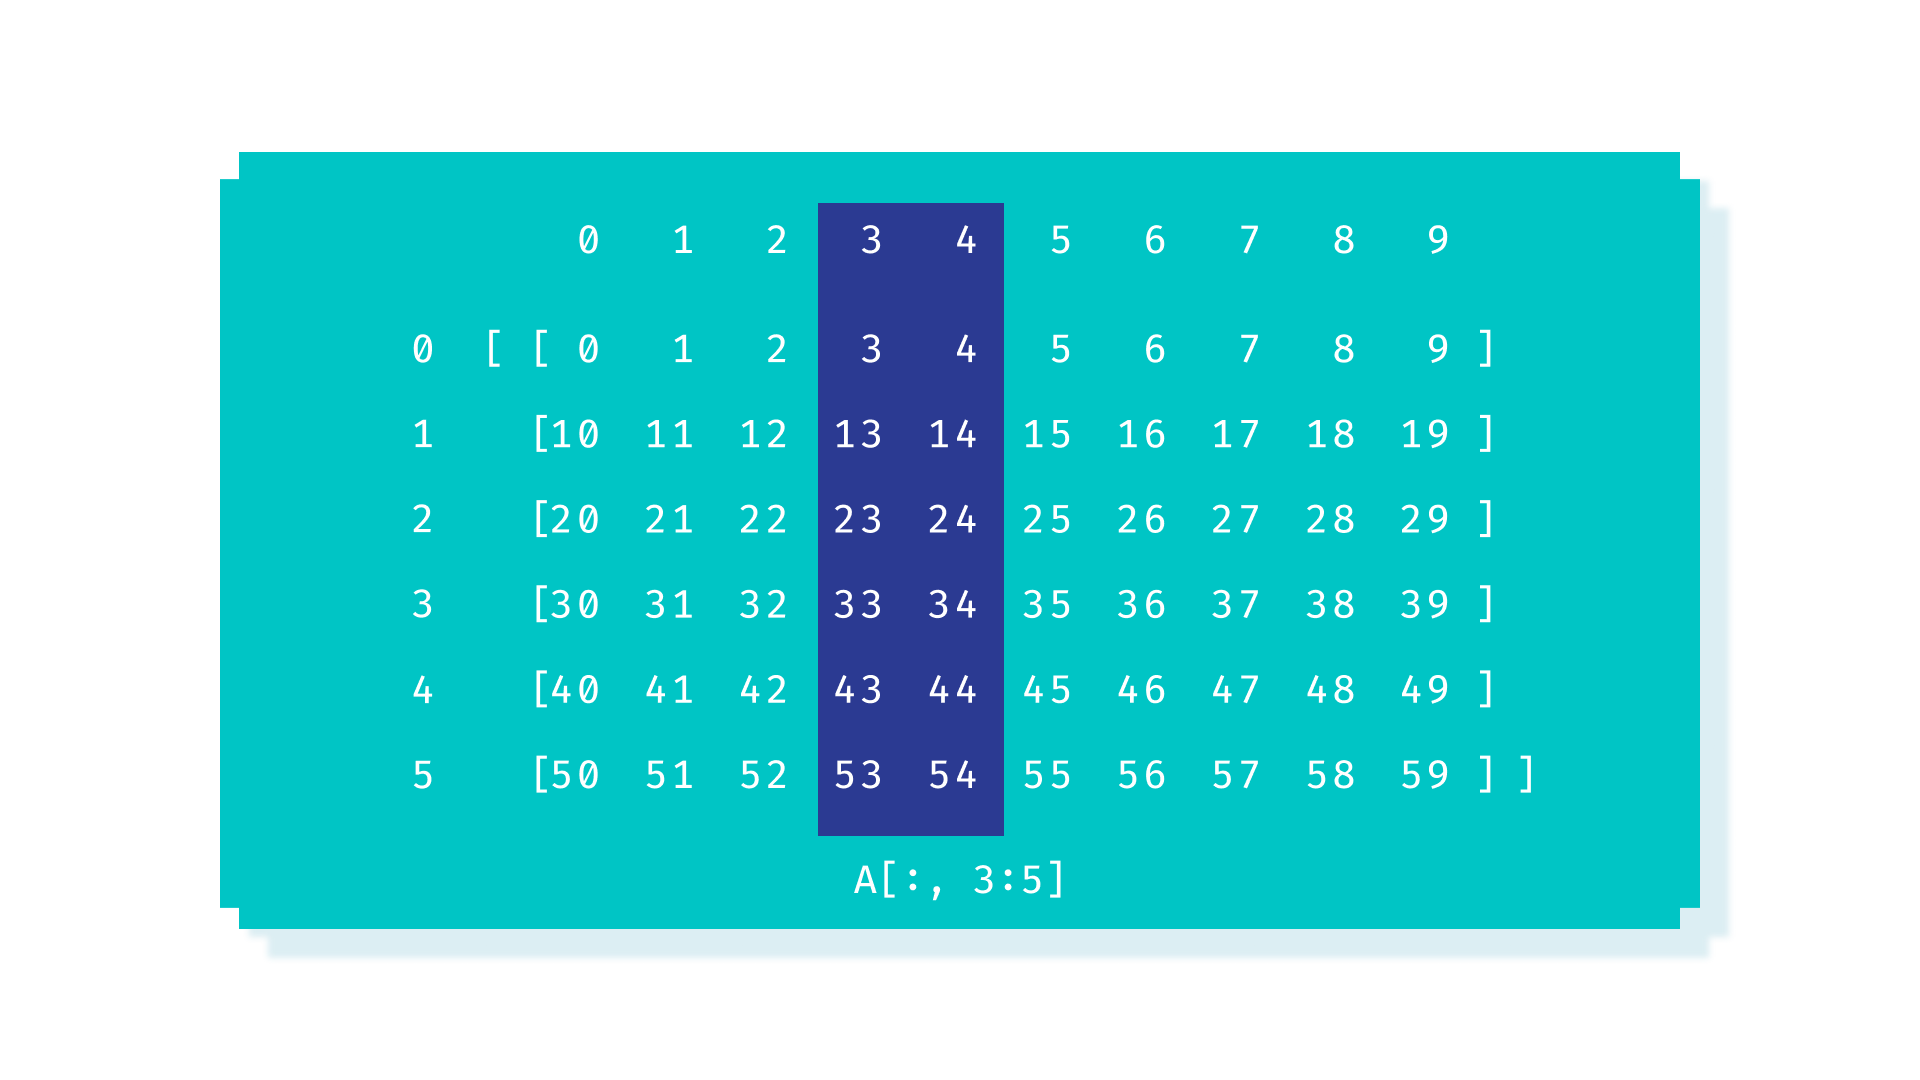

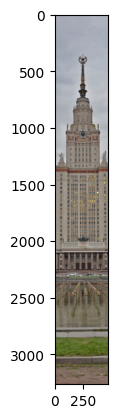

In [ ]:
plt.imshow(msu_image[:, 2200:2670])

Если один из краёв диапазона не указан, то за край будет принят соответствующий край массива.

Примем (5, 3) за точку разделения матрицы на срезы, и разрежем её на 4 прямоугольные части:

In [ ]:
row, col = 3, 5
A[:row, :col]

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

In [ ]:
row, col = 3, 5
A[row:, :col]

array([[30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44],
       [50, 51, 52, 53, 54]])

In [ ]:
row, col = 3, 5
A[:row, col:]

array([[ 5,  6,  7,  8,  9],
       [15, 16, 17, 18, 19],
       [25, 26, 27, 28, 29]])

In [ ]:
row, col = 3, 5
A[row:, col:]

array([[35, 36, 37, 38, 39],
       [45, 46, 47, 48, 49],
       [55, 56, 57, 58, 59]])

Такие же срезы картинки с МГУ:

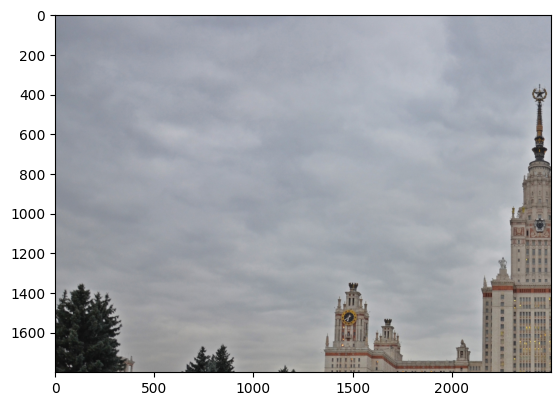

In [ ]:
plt.imshow(msu_image[:1800, :2500])

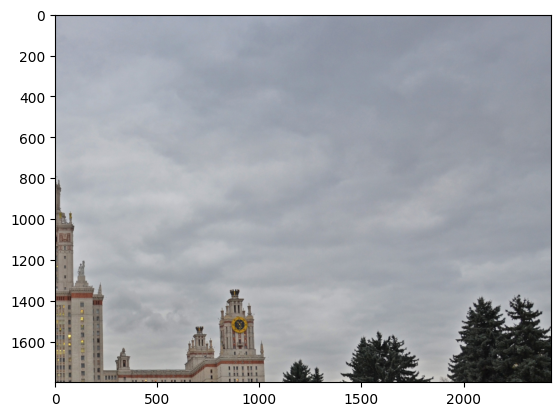

In [ ]:
plt.imshow(msu_image[:1800, 2500:])

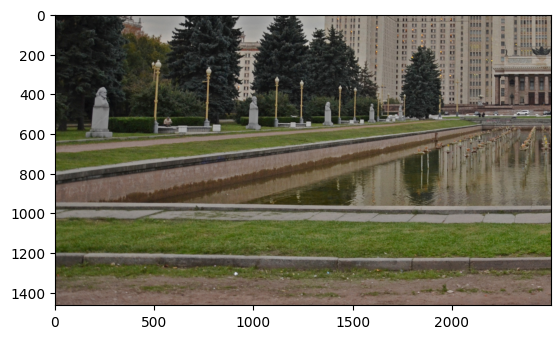

In [ ]:
plt.imshow(msu_image[1800:, :2500])

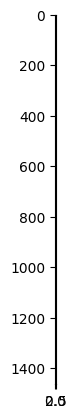

In [ ]:
plt.imshow(msu_image[1800:, 2500])

### Срез с тремя параметрами
Как вы помните, в классических срезах строк и списков могло быть и три параметра `[start:stop:step]`. В этом случае срез начинается с положения start до stop не включительно с шагом step. При этом шаг мог быть даже отрицательным!
Это позволит нам отразить картинку по любой из осей, например, по вертикали:

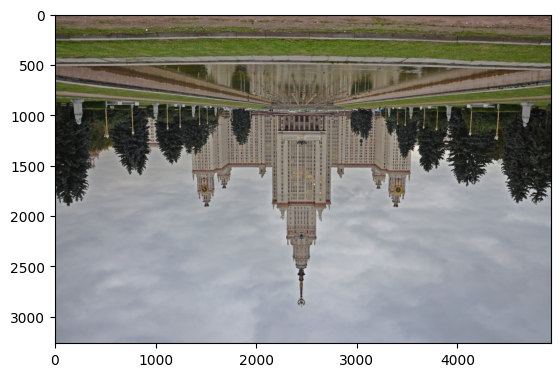

In [ ]:
plt.imshow(msu_image[::-1, :])

Мы можем взять только каждый десятый пиксел, что автоматически приведёт к уменьшению картинки в 10 раз:

Размеры картинки: (327, 493, 3)


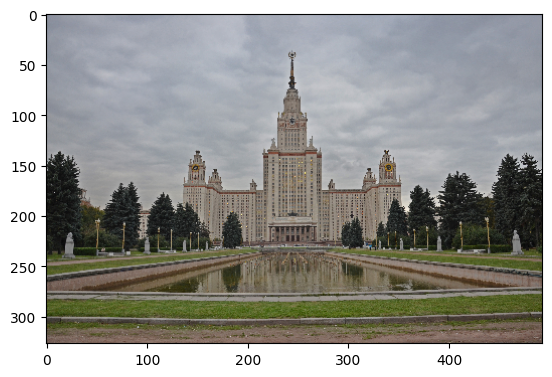

In [ ]:
msu_small = msu_image[::10, ::10]
print("Размеры картинки:", msu_small.shape)
plt.imshow(msu_small)

### Присваивания в срез
Присваивание в срез предназначено *для изменения исходного массива*, а не для создания нового.
В одномерные срезы массивов NumPy можно присваивать любые итерируемые объекты, даже генерирующие последовательность на лету.

In [ ]:
A = np.arange(60).reshape(6, 10)
A[:, 4] = range(111, 700, 111)
A

array([[  0,   1,   2,   3, 111,   5,   6,   7,   8,   9],
       [ 10,  11,  12,  13, 222,  15,  16,  17,  18,  19],
       [ 20,  21,  22,  23, 333,  25,  26,  27,  28,  29],
       [ 30,  31,  32,  33, 444,  35,  36,  37,  38,  39],
       [ 40,  41,  42,  43, 555,  45,  46,  47,  48,  49],
       [ 50,  51,  52,  53, 666,  55,  56,  57,  58,  59]])

Однако, если срез двумерный, то присваивать туда нужно только массив NumPy, причём совпадающего размера:

In [ ]:
A = np.arange(60).reshape(6, 10)
A[1::2, :] = np.zeros((3, 10))
A

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

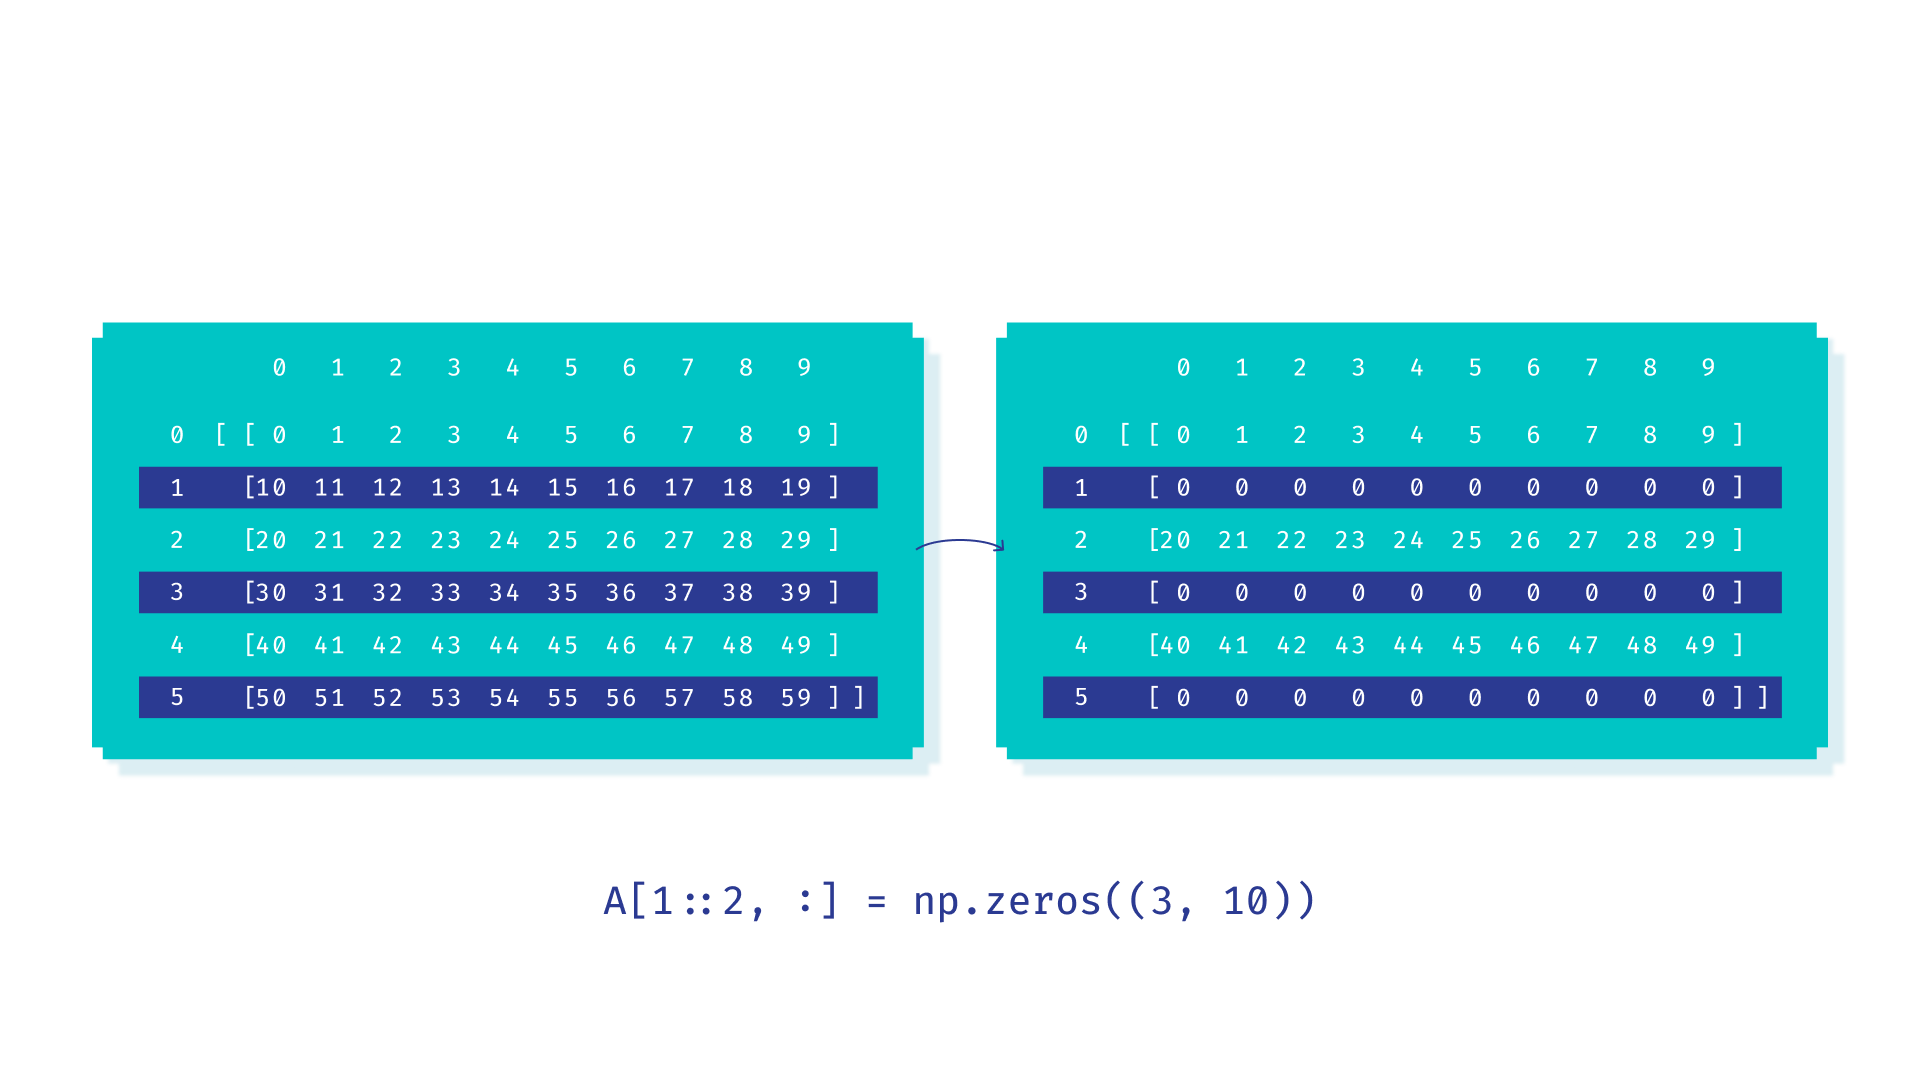

Удивительной и удобной возможностью является присваивание целому срезу *одного конкретного значения*.

Например, если нам нужно занулить кусок массива, мы можем не создавать аналогичный срезу по размеру `zeros`:

In [ ]:
A = np.arange(60).reshape(6, 10)
A[1:5, 3:8] = 0  # Да! Получается массовое присваивание одного значения!
A

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12,  0,  0,  0,  0,  0, 18, 19],
       [20, 21, 22,  0,  0,  0,  0,  0, 28, 29],
       [30, 31, 32,  0,  0,  0,  0,  0, 38, 39],
       [40, 41, 42,  0,  0,  0,  0,  0, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59]])

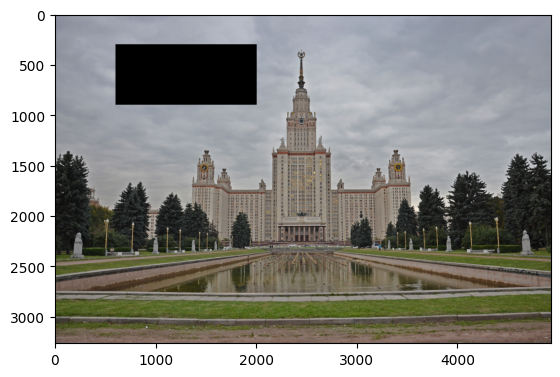

In [ ]:
msu_copy = msu_image.copy()
msu_copy[300:900, 600:2000] = 0
plt.imshow(msu_copy)

Поработаем с цветовыми слоями изображения:

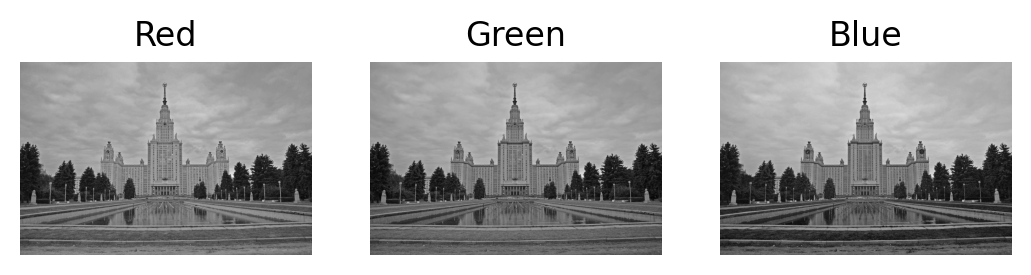

In [ ]:
msu_small = msu_image[::4, ::4]
msu_red = msu_small[:, :, 0]
msu_green = msu_small[:, :, 1]
msu_blue = msu_small[:, :, 2]
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, dpi=200)

for ax, color_channel, color_title in [(ax1, msu_red, 'Red'),
                                       (ax2, msu_green, 'Green'),
                                       (ax3, msu_blue, 'Blue')]:
    ax.set_title(color_title)
    ax.imshow(color_channel, cmap='gray')
    ax.axis('off')
plt.show()

Интересно было бы посмотреть на гистограммы яркости каналов. Количество бинов, очевидно, должно быть 256, т.к. на каждый канал обычно отводится по 1 байту, и значения яркости пиксела в канале идут от 0 до 255.

Построим гистограмму функцией `plt.hist`, которой передадим линеаризованный вид массива пикселей канала, полученный методом `ndarray.ravel()`:

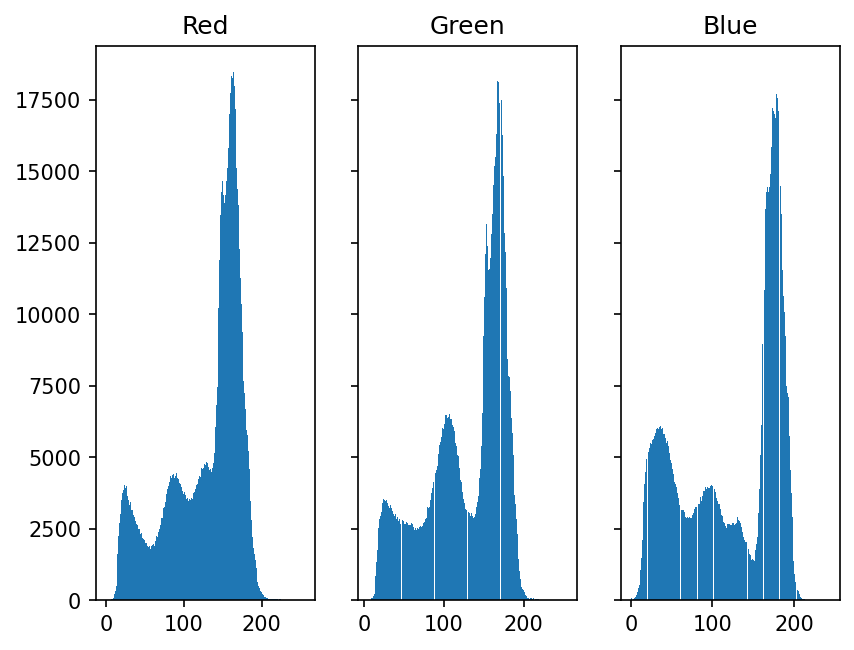

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, dpi=150, sharey='row')

for ax, color_channel, color_title in [(ax1, msu_red, 'Red'),
                                       (ax2, msu_green, 'Green'),
                                       (ax3, msu_blue, 'Blue')]:
    ax.set_title(color_title)
    ax.hist(color_channel.ravel(), bins=256)

plt.show()

Изучение гистограмм яркости каналов фотографии позволяет осуществлять профессиональную обработку изображения.

А мы ограничимся тем, что заметим сложную структуру этих гистограмм. Она косвенно говорит нам о том, что яркости пикселов не являются случайными величинами.

# Скорость работы программы
Настало время поговорить о скорости работы программного кода и способах ускорить работу с массивами.
Когда данных становится много, обработка массивов с ними начинает происходить достаточно долго, чтобы этим озаботиться.

Вот два варианта кода, которые делают почти одно и то же: создают список/массив заданной длины, а потом разворачивают его задом-наперёд.

In [ ]:
a = list(range(10000))
a[::-1] = a

In [ ]:
import numpy as np
a = np.array(range(10000))
a[::-1] = a

Очевидно, они работают с разной скоростью, но *как измерить скорость работы куска кода*?

Для этого можно воспользоваться отметками времени от начала вычислительного процесса, которые возвращает функция `perf_counter` из стандартной библиотеки `time`:

In [ ]:
import time

a = list(range(100000))
moment1 = time.perf_counter()
# код, скорость работы которого мы измеряем
a[::-1] = a
moment2 = time.perf_counter()
print(moment2 - moment1, "секунд потребовалось на выполнение.")

0.003161399974487722 секунд потребовалось на выполнение.


In [ ]:
import time
import numpy as np

a = np.array(range(100000))
moment1 = time.perf_counter()
# код, скорость работы которого мы измеряем
a[::-1] = a
moment2 = time.perf_counter()
print(moment2 - moment1, "секунд потребовалось на выполнение.")

0.0003195000463165343 секунд потребовалось на выполнение.


Таким методом вы можете вручную выяснять скорость выполнения вашего кода. Однако, от запуска к запуску время работы кода будет отличаться. По-хорошему, код нужно выполнить некоторое количество раз, чтобы собрать статистику и вычислить среднее время выполнения.

Библиотека `timeit` содержит функцию `timeit`, которая запускает данный ей кусочек кода столько раз, сколько вы попросите, и возвращает общее время выполнения кода в секундах:

In [ ]:
from timeit import timeit

In [ ]:
timeit("a[::-1] = a", "a = list(range(100000))", number=1000)

1.1875015000114217

In [ ]:
timeit("a[::-1] = a", "import numpy as np; a = np.array(range(100000))", number=1000)

0.12764289998449385